In [37]:
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
import eit
import pandas as pd
%matplotlib inline
plt.rc('text', usetex=True)
plt.rc('font', family='serif', serif='cm')


In [38]:
def weighted_std(values, weights, axis=None):
    """
    Return the weighted average and standard deviation.

    values, weights -- Numpy ndarrays with the same shape.
    """
    average = np.average(values, weights=weights, axis=axis)
    variance = np.average((values-average)**2, weights=weights, axis=axis)  # Fast and numerically precise
    return np.sqrt(variance)

In [39]:
root_path = 'results/temporal_recovery_'
run_ids = ['n=6_1d04b418', 'n=7_25c3f9a2', 'n=8_2ad7b103', 'n=9_8d22345e', 'n=12_6904a854']
compare_run_ids = ['n=6_collocation_3df2262a', 'n=7_collocation_2eca6267', 'n=8_collocation_0d24bb27', 'n=9_collocation_c38fc88d', 'n=12_collocation_be7e7a91']
ns = [6, 7, 8, 9, 12]
n_bdy = 32
n_sensor = 8
ylim = (0, 35)

In [40]:
results = []
weights = []
for run_id in run_ids:
    path = os.path.join(root_path + run_id, 'results.pkl')
    print(path)
    with open(path, 'rb') as f:
        result = pickle.load(f)
    results.append(result[-1])
    weights_path = os.path.join(root_path + run_id, 'detailed_summaries', 'Frame_18.csv')
    weights.append(pd.read_csv(weights_path).Weights)

results/temporal_recovery_n=6_1d04b418/results.pkl
results/temporal_recovery_n=7_25c3f9a2/results.pkl
results/temporal_recovery_n=8_2ad7b103/results.pkl
results/temporal_recovery_n=9_8d22345e/results.pkl
results/temporal_recovery_n=12_6904a854/results.pkl


In [41]:
compare_results = []
compare_weights = []
for run_id in compare_run_ids:
    path = os.path.join(root_path + run_id, 'results.pkl')
    print(path)
    with open(path, 'rb') as f:
        result = pickle.load(f)
    compare_results.append(result[-1])
    weights_path = os.path.join(root_path + run_id, 'detailed_summaries', 'Frame_18.csv')
    compare_weights.append(pd.read_csv(weights_path).Weights)


results/temporal_recovery_n=6_collocation_3df2262a/results.pkl
results/temporal_recovery_n=7_collocation_2eca6267/results.pkl
results/temporal_recovery_n=8_collocation_0d24bb27/results.pkl
results/temporal_recovery_n=9_collocation_c38fc88d/results.pkl
results/temporal_recovery_n=12_collocation_be7e7a91/results.pkl


In [42]:
actual_ns = [len(eit.grids.construct_circular(n, n_bdy, n_sensor).all) for n in ns]

In [43]:
actual_ns

[165, 209, 259, 316, 523]

In [44]:
stds = [np.mean(weighted_std(np.exp(r), w, axis=0)) for r, w in zip(results, weights)]
compare_stds = [np.mean(weighted_std(np.exp(r), w, axis=0)) for r,w in zip(compare_results, compare_weights)]

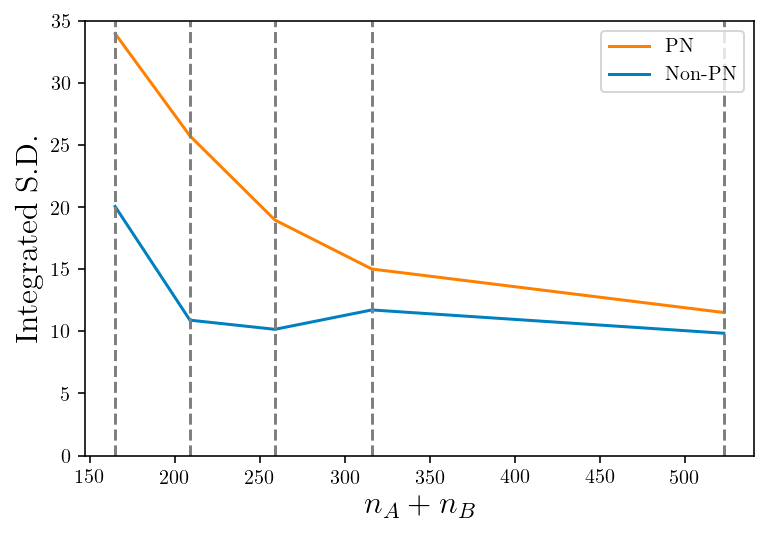

In [47]:
plt.plot(actual_ns, stds, label='PN',c=plt.cm.get_cmap('autumn')(0.5))
plt.plot(actual_ns, compare_stds, label='Non-PN', c=plt.cm.get_cmap('winter')(0.5))
plt.legend()
plt.xlabel('$n_A + n_B$', fontsize=16)
plt.ylabel('Integrated S.D.', fontsize=16)
if ylim is not None:
    plt.ylim(ylim)

for n in actual_ns:
    plt.axvline(n, linestyle='--', c='gray')
plt.savefig('figures/integrated_variance_temporal.pdf')